In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

In [1]:
def train_test_yr2(df, stocks):
    df_yr1 = df[df["Year"] == 2021]
    df_yr1_X = df_yr1[["mean_return", "volatility"]].values
    df_yr1_Y = df_yr1[["Label"]].values.flatten()
    
    nb_clf = GaussianNB().fit(df_yr1_X, df_yr1_Y)

    df_yr2 = df[df["Year"] == 2022]
    df_yr2_X = df_yr2[["mean_return", "volatility"]].values
    y_true = df_yr2[["Label"]].values.flatten()
    y_pred = nb_clf.predict(df_yr2_X)
    print(f"Accuracy on year 2 -> {round(100*accuracy_score(y_true, y_pred), 2)} %")
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Speficitivity -> {tnr} %")
    ConfusionMatrixDisplay(conf_matrix, display_labels=["red", "green"]).plot()
    plt.show()
    
    i1, i2 = 100, 100
    bnh = []
    trade_gnb = []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(y_pred.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if y_pred[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_gnb.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_gnb)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to Naive Bayes predicted labels")
    plt.show()
    
    print(f"Final Amount for BnH -> $ {round(i1, 2)}")
    print(f"Final Amount for Naive Bayes -> $ {round(i2, 2)}")

Accuracy on year 2 -> 46.15 %
Recall -> 12.9 %
Speficitivity -> 95.24 %


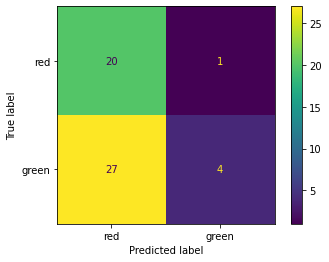

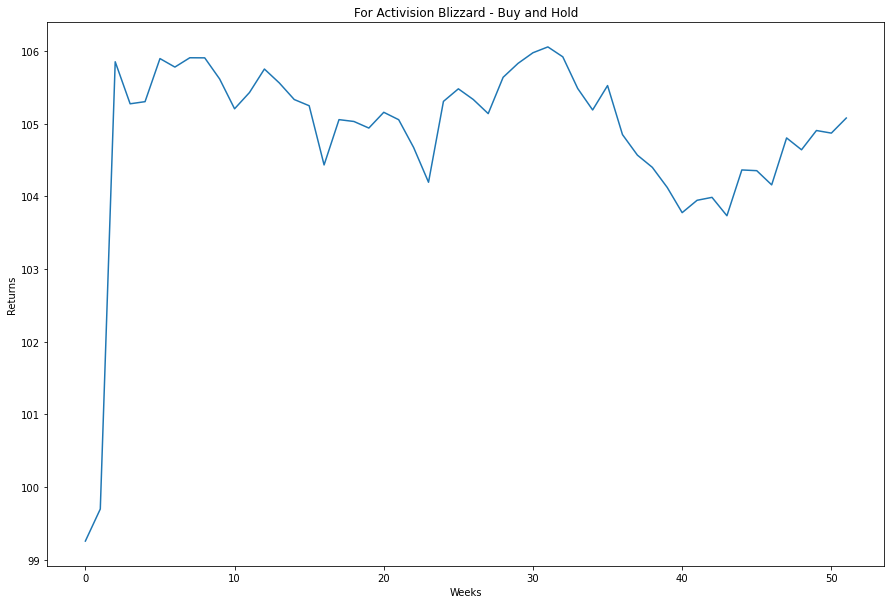

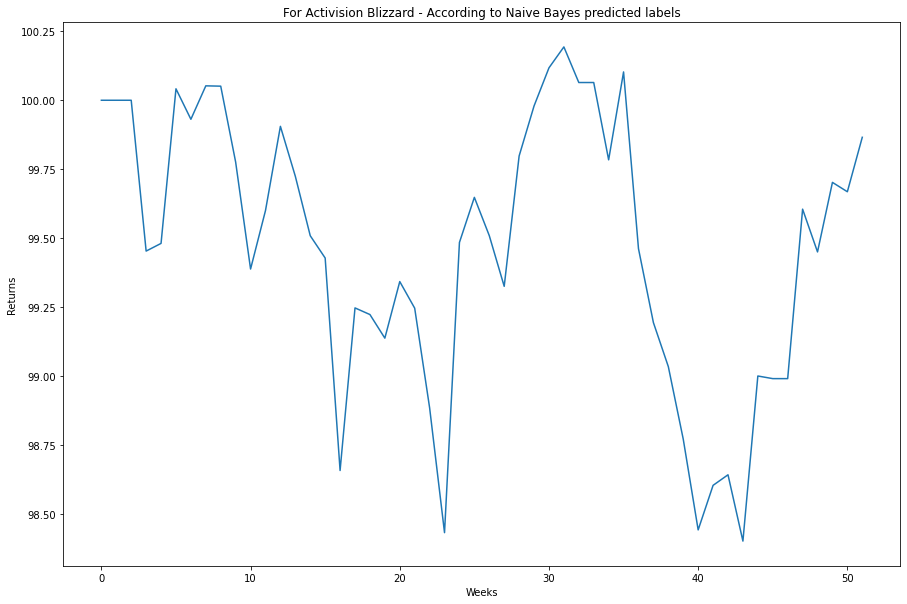

Final Amount for BnH -> $ 105.08
Final Amount for Naive Bayes -> $ 99.87


In [4]:
train_test_yr2(df_atvi, "Activision Blizzard")

Accuracy on year 2 -> 38.46 %
Recall -> 11.76 %
Speficitivity -> 88.89 %


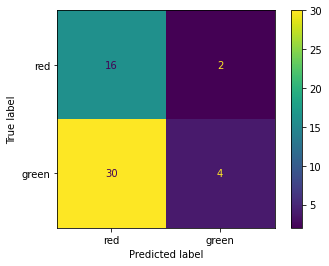

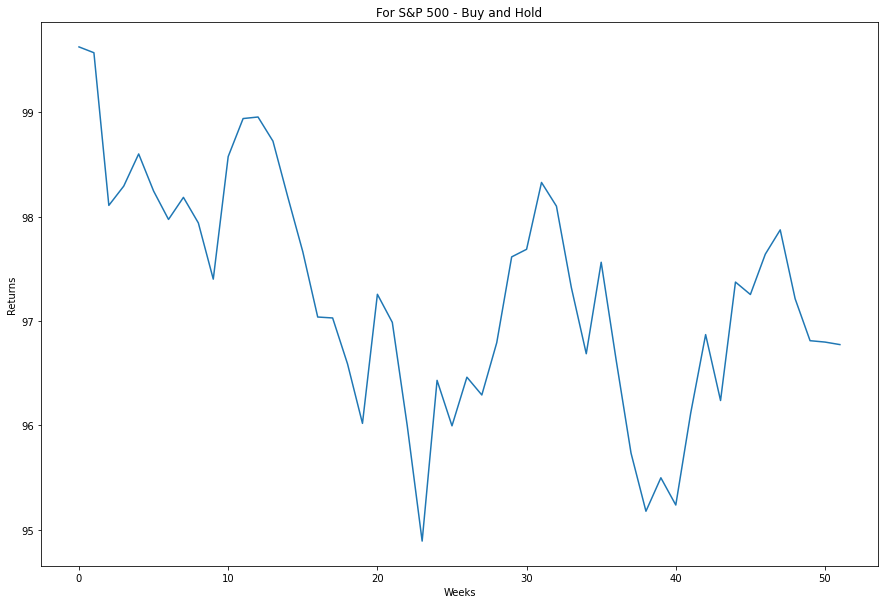

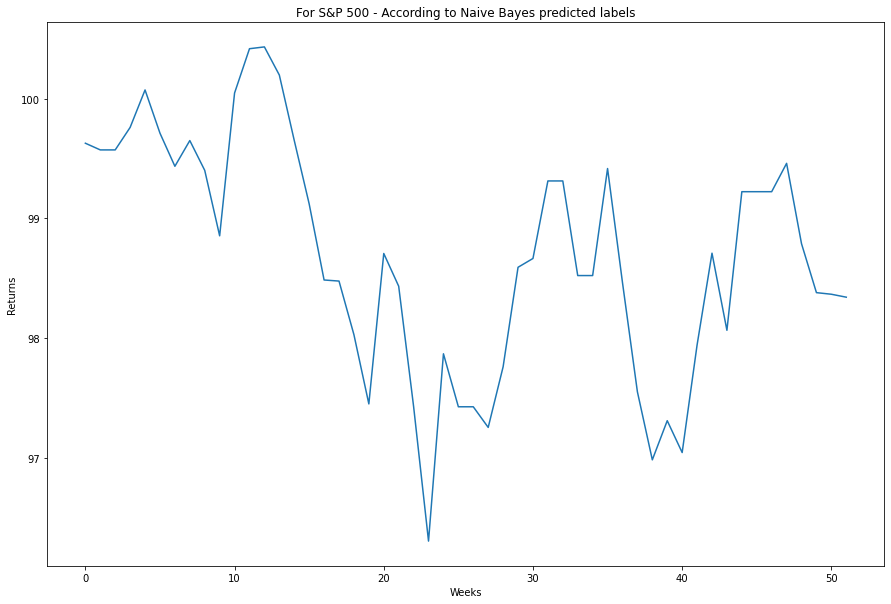

Final Amount for BnH -> $ 96.77
Final Amount for Naive Bayes -> $ 98.34


In [5]:
train_test_yr2(df_spy, "S&P 500")